# Redes Neurais

## Importando bibliotecas

O primeiro passo quando se trata de lidar com redes neurais é a escolha do Dataset e como iremos trabalha-lo. Para esse trabalho nossa dupla ficou com o **Adult dataset**, que tem como objetivo fornecer um conjunto de dados demográficos para que a rede neural acerte se a renda dessa pessoa descrita será maior ou menor que 50K doláres por anos.

Para começar, vamos iniciar importando nossas variáveis e realizando o tratamento dos dados nosso dataset. As bibliotecas utilizadas serão:

*   Pandas (Para manipulação e tratamento do dataset)
*   TensorFlow (Para a construção da rede neural)
*   Pygame (Para visualização dos dados e futuramente interface gráfica)
*   Sklearn (Para divisão dos dados entre treino e teste)
*   Matplotlib (Para ajudar na visualização dos gráficos)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pygame
import matplotlib.pyplot as plt

## Importando o Dataset

Como dito anteriormente, agora faremos a importação do dataset e tratamento dos dados, retirando os valores nulos e normalizando os dados para que a nossa rede neural consiga entender de uma forma mais simples os dados. Esse processo é importante uma vez que na base de dados existem muitos valores em forma de texto mas que podem ser categorizados, como profissões, raça, gênero e etc.

In [59]:
#Carregando o dataset
file_name = 'adult.csv'
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(file_name, header=0, sep=',', na_values="?", skipinitialspace=True)

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [60]:
# Remover linhas com valores ausentes
data.dropna(inplace=True)

# Codificação de variáveis categóricas - essa parte basicamente transforma tudo
# em número, pois é necessário para algumas redes neurais, a profissão "local-gov"
# virou o numero 1
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


## Separando os dados de Teste e Treino e treinando o Modelo

Após o tratamento do dataset, nossos dados estão preparados para serem separados em dados de teste e dados de treino para treinamento do nosso modelo de rede neural.

In [61]:
# Dividir em features e labels
x = data.drop("income", axis=1) # dataset sem a variável "target"
y = data["income"] # nossa variável target

# Normalizar os dados
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Dividir o dataset em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Construir o modelo
modelo = Sequential([
    Dense(units = 64, activation='relu', input_shape=(x_treino.shape[1],)),
    Dense(units = 32, activation='relu'),
    Dense(units = 16, activation='relu'),
    # Dense(units=1, activation='sigmoid')
    Dense(units = 1, activation='linear')
]) # nosso modelo tem 1 camada de entrada com 64 neuronios, 1 camada oculta com
   # 32 neuronios e 1 camada de saída com 1 neurônio apenas pois será uma saída
   # binária (ou recebe menos ou mais que 50k)

# Compilar o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# modelo.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Treinar o modelo
history = modelo.fit(x_treino, y_treino, epochs=50, batch_size = 32, validation_data=(x_teste, y_teste))

Epoch 1/50
1131/1131 [==============================] - 3s 2ms/step - loss: 0.4499 - accuracy: 0.8126 - val_loss: 0.3998 - val_accuracy: 0.8343
Epoch 2/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.3918 - accuracy: 0.8306 - val_loss: 0.3997 - val_accuracy: 0.8419
Epoch 3/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.3794 - accuracy: 0.8357 - val_loss: 0.3827 - val_accuracy: 0.8415
Epoch 4/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.3772 - accuracy: 0.8390 - val_loss: 0.3761 - val_accuracy: 0.8444
Epoch 5/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.3848 - accuracy: 0.8382 - val_loss: 0.4874 - val_accuracy: 0.8242
Epoch 6/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.3860 - accuracy: 0.8363 - val_loss: 0.3648 - val_accuracy: 0.8460
Epoch 7/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8390 - val_loss: 0.3646 - val_accuracy:

In [63]:
# Inicializar o Pygame
pygame.init()

# Configurações da janela
width, height = 1200, 600
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Treinamento da Rede Neural")

# Cores
black = (0, 0, 0)
white = (255, 255, 255)

# Função para desenhar gráficos
def desenhaGrafico(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    plt.figure(figsize=(12, 6))

    # Plotar precisão
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Acurácia de Treinamento')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Acurácia de Validação')
    plt.title('Acurácia durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Plotar perda
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Perda de Treinamento')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Perda de Validação')
    plt.title('Perda durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()

    plt.savefig('training_graph.png')
    plt.close()

desenhaGrafico(history)

# Carregar o gráfico gerado
training_graph = pygame.image.load('training_graph.png')

# Loop principal do Pygame
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # Desenhar no Pygame
    window.fill(white)
    window.blit(training_graph, (0, 0))
    
    pygame.display.flip()

pygame.quit()

# KNN (K-Vizinhos mais próximos)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)  # Aqui, n_neighbors é o número de vizinhos

# Treinar o classificador com os dados de treinamento
knn.fit(x_treino, y_treino)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(x_teste)
y_prob = knn.predict_proba(x_teste)[:, 1]  # Probabilidades para a curva ROC

In [66]:
# Calcular a acurácia
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia: {acuracia}")

# Relatório de classificação
relatorio = classification_report(y_teste, y_pred)
print("Relatório de Classificação:")
print(relatorio)

# Matriz de confusão
matrizConfusao = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:")
print(matrizConfusao)


Acurácia: 0.8278606965174129
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6842
           1       0.67      0.59      0.62      2203

    accuracy                           0.83      9045
   macro avg       0.77      0.75      0.76      9045
weighted avg       0.82      0.83      0.82      9045

Matriz de Confusão:
[[6192  650]
 [ 907 1296]]


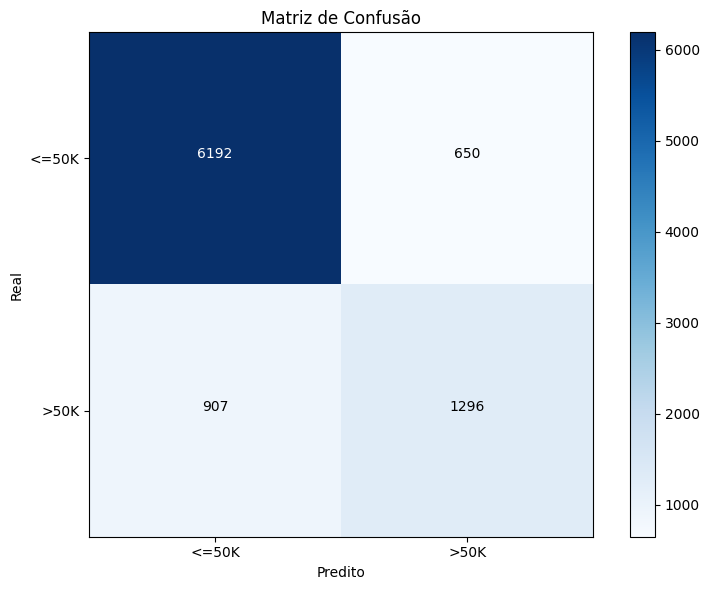

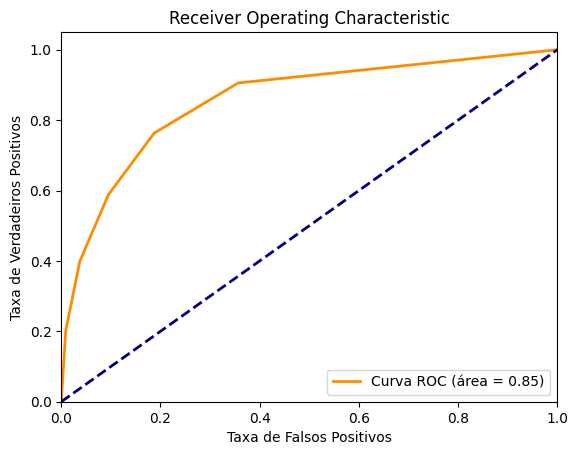

In [67]:
# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
plt.imshow(matrizConfusao, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])

thresh = matrizConfusao.max() / 2.
for i, j in itertools.product(range(matrizConfusao.shape[0]), range(matrizConfusao.shape[1])):
    plt.text(j, i, format(matrizConfusao[i, j], 'd'),
             horizontalalignment="center",
             color="white" if matrizConfusao[i, j] > thresh else "black")

plt.ylabel('Real')
plt.xlabel('Predito')
plt.tight_layout()
plt.show()

# Calcular a curva ROC e a AUC
fpr, tpr, _ = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Modelo por Árvore de Decisão

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

In [69]:
# Inicializar o classificador de árvore de decisão
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Treinar o classificador com os dados de treinamento
tree.fit(x_treino, y_treino)

# Fazer previsões com o conjunto de teste
y_pred = tree.predict(x_teste)
y_prob = tree.predict_proba(x_teste)[:, 1]  # Probabilidades para a curva ROC

In [70]:
# Calcular a acurácia
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia: {accuracy}")

# Relatório de classificação
report = classification_report(y_teste, y_pred)
print("Relatório de Classificação:")
print(report)

# Matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Acurácia: 0.8517412935323383
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6842
           1       0.79      0.54      0.64      2203

    accuracy                           0.85      9045
   macro avg       0.83      0.75      0.77      9045
weighted avg       0.85      0.85      0.84      9045

Matriz de Confusão:
[[6517  325]
 [1016 1187]]


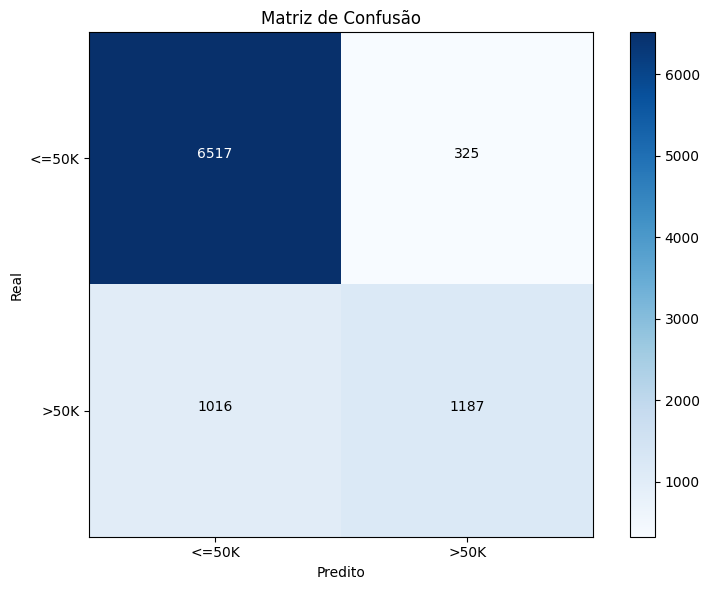

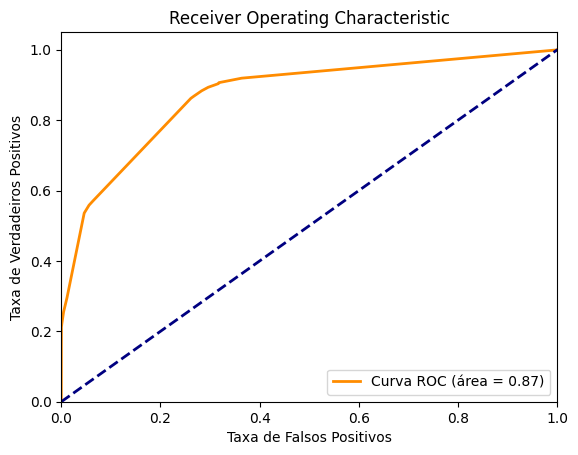

In [71]:
# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Real')
plt.xlabel('Predito')
plt.tight_layout()
plt.show()

# Calcular a curva ROC e a AUC
fpr, tpr, _ = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

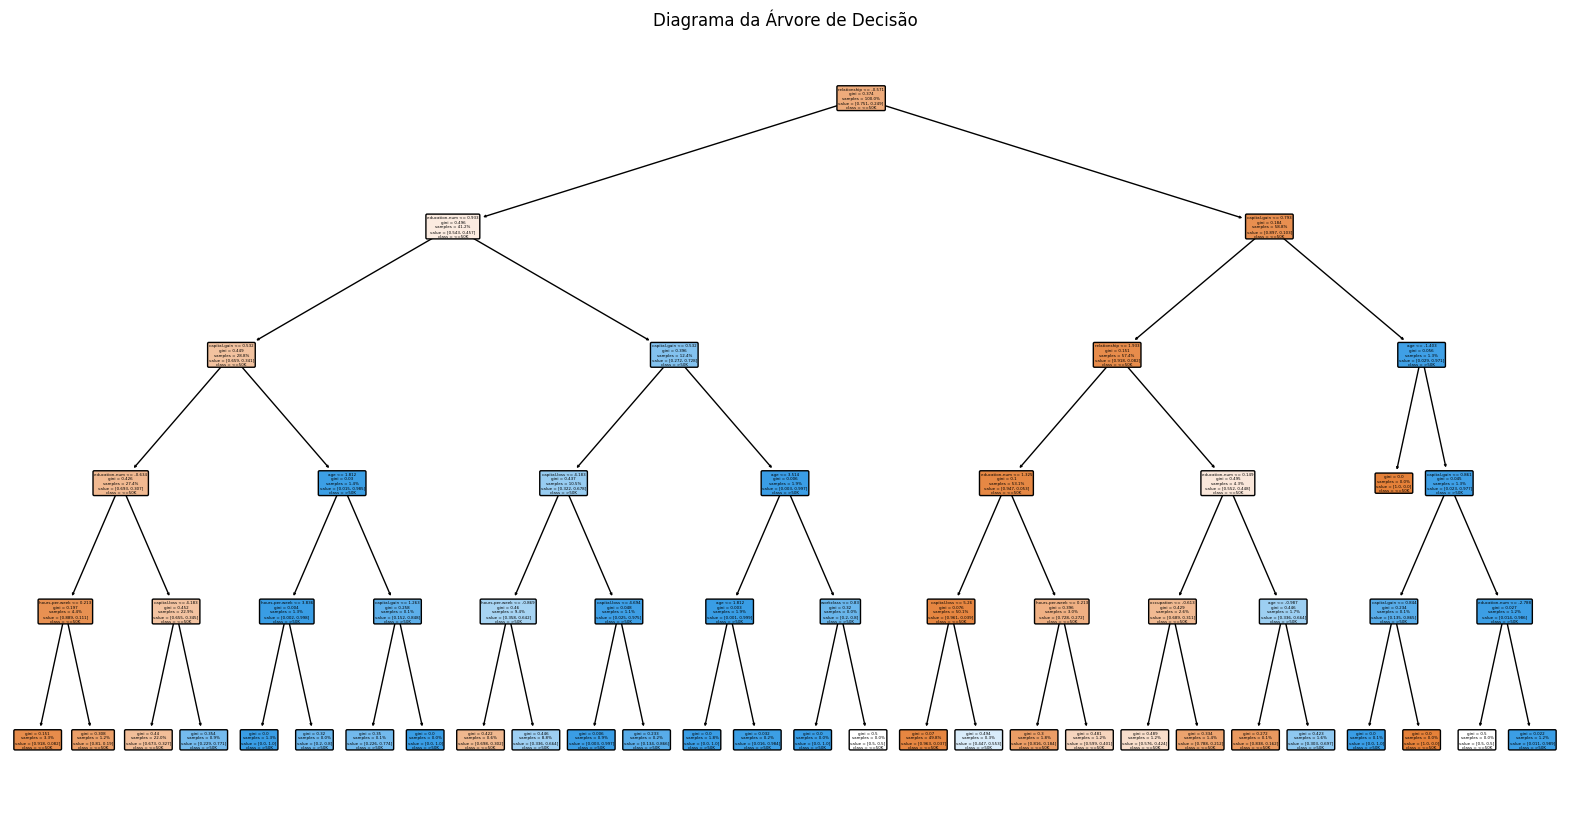

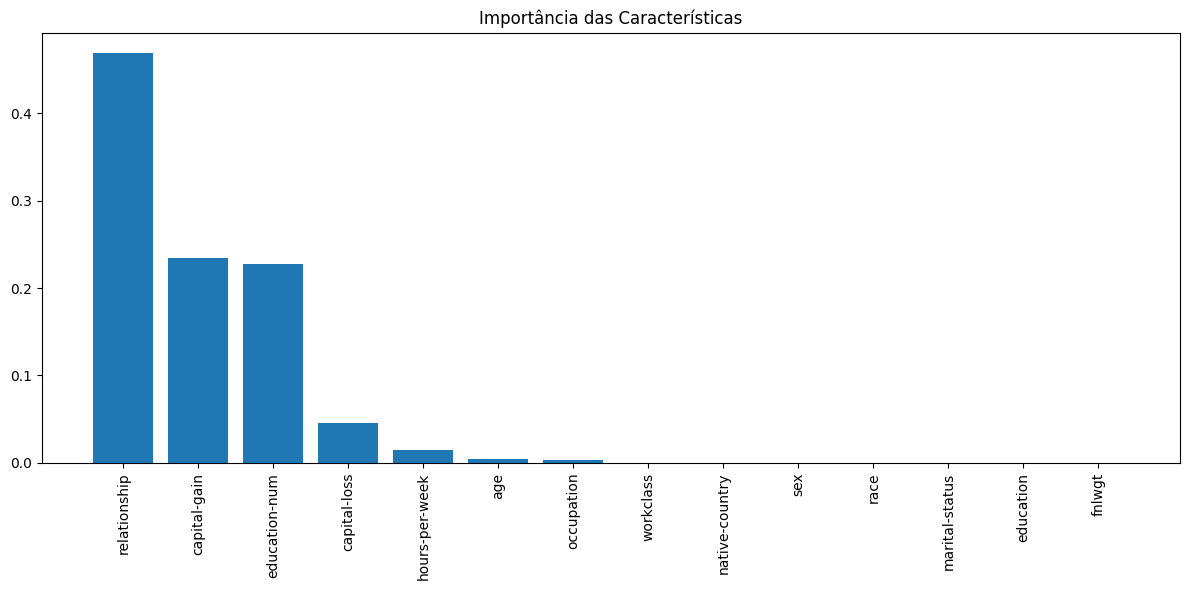

In [72]:
# Plotar o Diagrama da Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=column_names[:-1], class_names=['<=50K', '>50K'], rounded=True, proportion=True)
plt.title('Diagrama da Árvore de Decisão')
plt.show()

# Plotar a Importância das Características
feature_importances = tree.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Importância das Características')
plt.bar(range(x.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(x.shape[1]), [column_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
